### Overview:
In this notebook, I explored patterns in employee retention and termination to analyze decisions around recruitment and performance. I examined which recruitment sources are linked to higher retention, identified common termination reasons, and analyzed how these reasons vary by department, performance scores, and employment satisfaction. I wanted to highlight the relationship between these factors using different visualization tools. This analysis provides insight into turnover drivers and supports strategic improvements in hiring and employee engagement.

### Part 1: Load & Import Data

In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# import data
data = pd.read_csv("../data/HRDataset.csv")

In [31]:
# Identify column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [32]:
# view first 5 rows of your data
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Part 2: Code & Data Visualization/Retention & Termination Per Recruitment Source

In [33]:
# Here I wanted to isolate the specific columns I needed
grouped = data[["RecruitmentSource", "EmploymentStatus", "Termd", "TermReason", "DateofTermination", "DateofHire", "Department", "Position", "PerformanceScore", "EmpSatisfaction"]]
print(grouped)


     RecruitmentSource        EmploymentStatus  Termd         TermReason  \
0             LinkedIn                  Active      0  N/A-StillEmployed   
1               Indeed  Voluntarily Terminated      1      career change   
2             LinkedIn  Voluntarily Terminated      1              hours   
3               Indeed                  Active      0  N/A-StillEmployed   
4        Google Search  Voluntarily Terminated      1   return to school   
..                 ...                     ...    ...                ...   
306           LinkedIn                  Active      0  N/A-StillEmployed   
307      Google Search  Voluntarily Terminated      1   Another position   
308  Employee Referral                  Active      0  N/A-StillEmployed   
309  Employee Referral                  Active      0  N/A-StillEmployed   
310           LinkedIn                  Active      0  N/A-StillEmployed   

    DateofTermination DateofHire         Department                  Position  \
0     

In [34]:
# Here I wanted to save these specific columns as a CSV file for easy access
grouped.to_csv('grouped.csv', index=False)


In [ ]:
# 
retention_df = grouped.groupby('RecruitmentSource').agg(
    total_employees=('EmploymentStatus', 'count'),
    retained_employees=('Termd', lambda x: (x == 0).sum())
).reset_index()

In [ ]:
# 
retention_df['retention_rate'] = retention_df['retained_employees'] / retention_df['total_employees'] * 100
retention_df.sort_values('retention_rate', ascending=False, inplace=True)
retention_df

,RecruitmentSource,total_employees,retained_employees,retention_rate
8,Website,13,12,92.307692
2,Employee Referral,31,26,83.870968
5,LinkedIn,76,58,76.315789
4,Indeed,87,66,75.862069
0,CareerBuilder,23,12,52.173913
7,Other,2,1,50.000000
1,Diversity Job Fair,29,13,44.827586
3,Google Search,49,19,38.775510
6,On-line Web application,1,0,0.000000


/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_31842/4179247475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


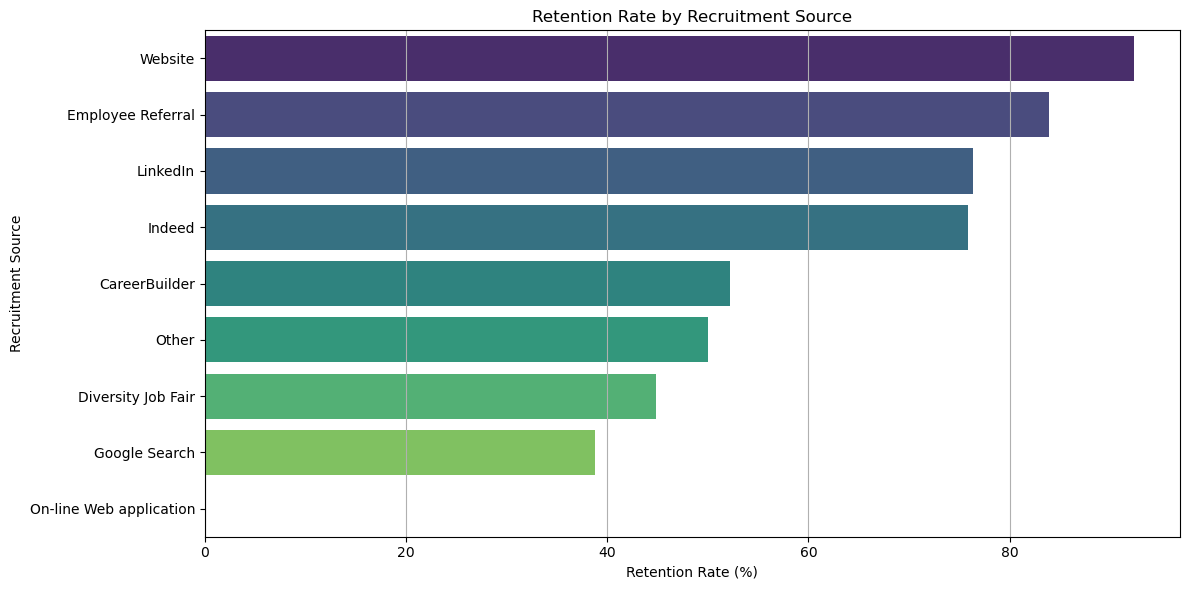

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=retention_df,
    x='retention_rate',
    y='RecruitmentSource',
    palette='viridis'
)
plt.xlabel('Retention Rate (%)')
plt.ylabel('Recruitment Source')
plt.title('Retention Rate by Recruitment Source')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [38]:
grouped.isnull().sum()

RecruitmentSource      0
EmploymentStatus       0
Termd                  0
TermReason             0
DateofTermination    207
DateofHire             0
Department             0
Position               0
PerformanceScore       0
EmpSatisfaction        0
dtype: int64

In [39]:
# Dropped retained employee data to store only terminated employees
grouped.dropna()

,RecruitmentSource,EmploymentStatus,Termd,TermReason,DateofTermination,DateofHire,Department,Position,PerformanceScore,EmpSatisfaction
1,Indeed,Voluntarily Terminated,1,career change,6/16/2016,3/30/2015,IT/IS,Sr. DBA,Fully Meets,3
2,LinkedIn,Voluntarily Terminated,1,hours,9/24/2012,7/5/2011,Production,Production Technician II,Fully Meets,3
4,Google Search,Voluntarily Terminated,1,return to school,9/6/2016,7/11/2011,Production,Production Technician I,Fully Meets,4
10,Diversity Job Fair,Voluntarily Terminated,1,Another position,1/12/2017,1/10/2011,Production,Production Technician I,Fully Meets,4
11,Diversity Job Fair,Voluntarily Terminated,1,unhappy,9/19/2016,4/2/2012,Production,Production Technician I,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...
301,Website,Voluntarily Terminated,1,unhappy,9/7/2015,5/16/2011,Production,Production Technician I,Fully Meets,3
302,Google Search,Voluntarily Terminated,1,Another position,5/14/2012,1/10/2011,Production,Production Technician I,Fully Meets,5
303,Diversity Job Fair,Voluntarily Terminated,1,relocation out of area,6/27/2015,1/9/2012,Production,Production Technician I,Fully Meets,4
304,LinkedIn,Voluntarily Terminated,1,retiring,2/21/2016,1/7/2013,Production,Production Technician II,Exceeds,3


In [40]:
# Storing terminated employee data as a new DF
terminated_only = grouped[grouped['Termd'] == 1]

In [41]:
# Here I wanted to count number of terminations based on the recruitment source
termination_counts = terminated_only['RecruitmentSource'].value_counts().reset_index()
termination_counts.columns = ['RecruitmentSource', 'termination_count']
print(termination_counts)

         RecruitmentSource  termination_count
0            Google Search                 30
1                   Indeed                 21
2                 LinkedIn                 18
3       Diversity Job Fair                 16
4            CareerBuilder                 11
5        Employee Referral                  5
6  On-line Web application                  1
7                    Other                  1
8                  Website                  1


/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_31842/3573038870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=termination_counts, x='termination_count', y='RecruitmentSource', palette='magma')


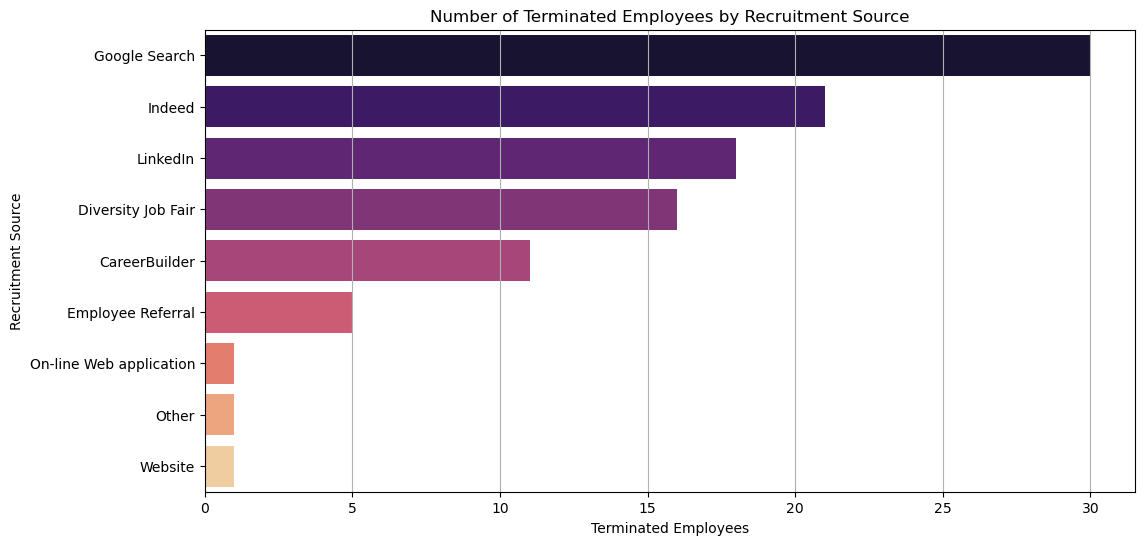

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=termination_counts, x='termination_count', y='RecruitmentSource', palette='magma')
plt.title('Number of Terminated Employees by Recruitment Source')
plt.xlabel('Terminated Employees')
plt.ylabel('Recruitment Source')
plt.grid(True, axis='x')
plt.show()

In [43]:
grouped = data.groupby('RecruitmentSource').agg(
    total_employees=('EmploymentStatus', 'count'),
    retained=('Termd', lambda x: (x == 0).sum()),
    terminated=('Termd', lambda x: (x == 1).sum())
).reset_index()
print(grouped)

         RecruitmentSource  total_employees  retained  terminated
0            CareerBuilder               23        12          11
1       Diversity Job Fair               29        13          16
2        Employee Referral               31        26           5
3            Google Search               49        19          30
4                   Indeed               87        66          21
5                 LinkedIn               76        58          18
6  On-line Web application                1         0           1
7                    Other                2         1           1
8                  Website               13        12           1


In [44]:
print(grouped.columns.tolist())

['RecruitmentSource', 'total_employees', 'retained', 'terminated']


In [45]:
melted = pd.melt(grouped,
                 id_vars='RecruitmentSource',
                 value_vars=['retained', 'terminated'],
                 var_name='Status',
                 value_name='Rate')
print(melted)

          RecruitmentSource      Status  Rate
0             CareerBuilder    retained    12
1        Diversity Job Fair    retained    13
2         Employee Referral    retained    26
3             Google Search    retained    19
4                    Indeed    retained    66
5                  LinkedIn    retained    58
6   On-line Web application    retained     0
7                     Other    retained     1
8                   Website    retained    12
9             CareerBuilder  terminated    11
10       Diversity Job Fair  terminated    16
11        Employee Referral  terminated     5
12            Google Search  terminated    30
13                   Indeed  terminated    21
14                 LinkedIn  terminated    18
15  On-line Web application  terminated     1
16                    Other  terminated     1
17                  Website  terminated     1


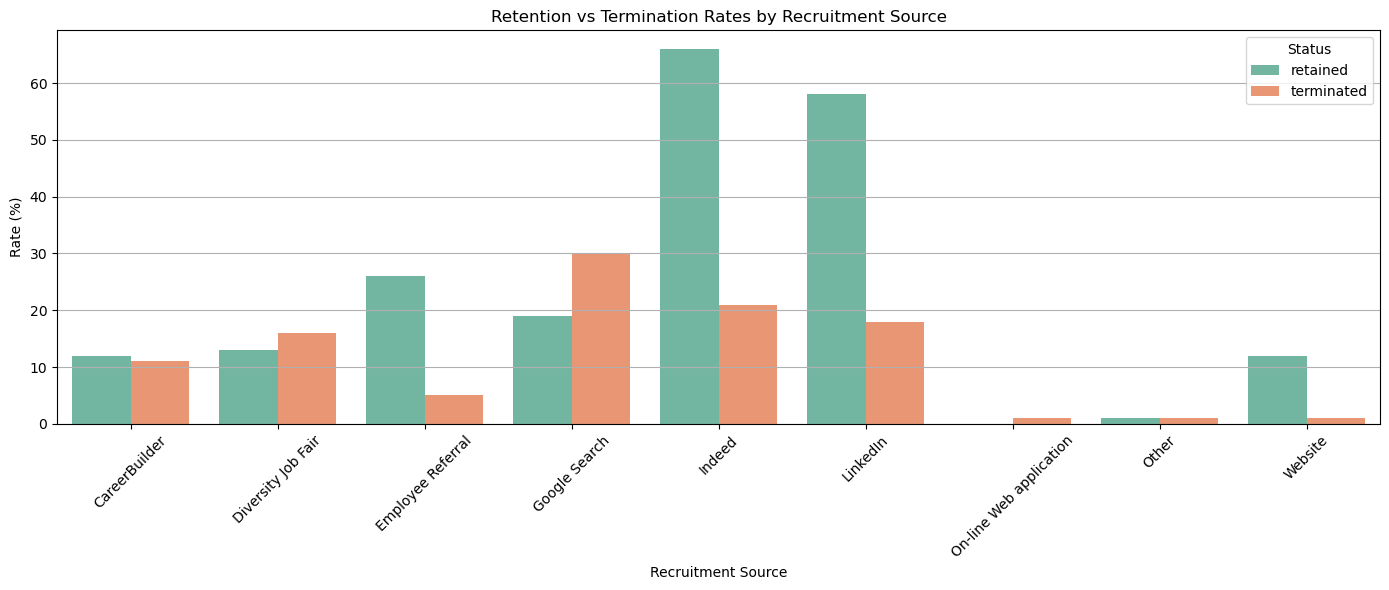

In [46]:
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='RecruitmentSource', y='Rate', hue='Status', palette='Set2')
plt.title('Retention vs Termination Rates by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [47]:
terminated_only['DateofHire'] = pd.to_datetime(terminated_only['DateofHire'])
terminated_only['DateofTermination'] = pd.to_datetime(terminated_only['DateofTermination'])
terminated_only['TenureYears'] = (terminated_only['DateofTermination'] - terminated_only['DateofHire']).dt.days / 365

In [48]:
terminated_only['TermReason'].value_counts()

TermReason
Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
performance                          4
military                             4
retiring                             4
no-call, no-show                     4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: count, dtype: int64

/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_31842/2230608060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=terminated_only, y='TermReason', order=terminated_only['TermReason'].value_counts().index, palette='pastel')


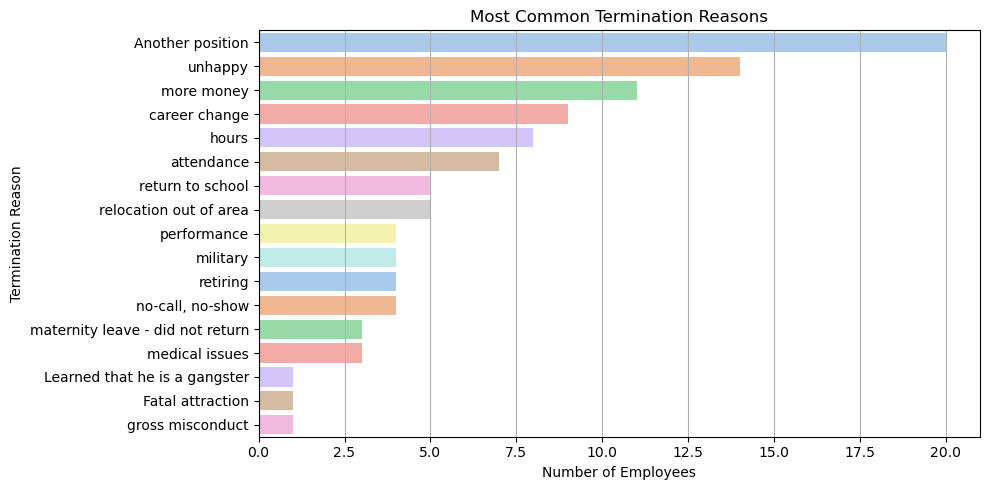

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=terminated_only, y='TermReason', order=terminated_only['TermReason'].value_counts().index, palette='pastel')
plt.title('Most Common Termination Reasons')
plt.xlabel('Number of Employees')
plt.ylabel('Termination Reason')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [50]:
summary2 = terminated_only.groupby(['TermReason', 'Department']).size().reset_index(name='Count')
print(summary2)

                          TermReason            Department  Count
0                   Another position                 IT/IS      1
1                   Another position     Production            17
2                   Another position                 Sales      1
3                   Another position  Software Engineering      1
4                   Fatal attraction                 Sales      1
5      Learned that he is a gangster                 IT/IS      1
6                         attendance     Production             5
7                         attendance                 Sales      1
8                         attendance  Software Engineering      1
9                      career change         Admin Offices      1
10                     career change                 IT/IS      1
11                     career change     Production             6
12                     career change  Software Engineering      1
13                  gross misconduct     Production             1
14        

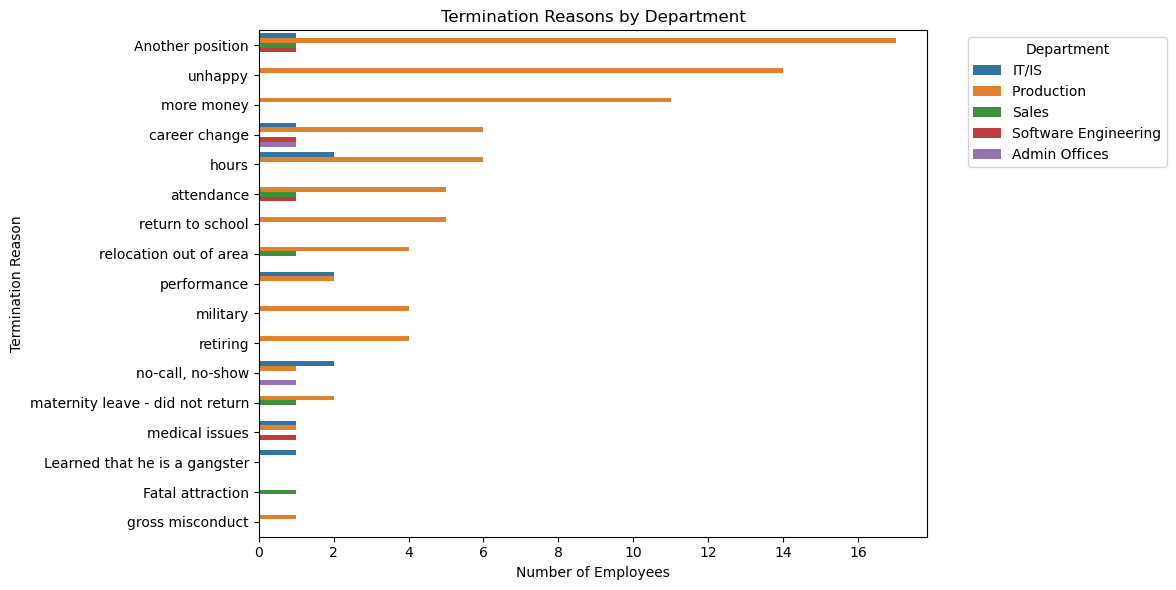

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=terminated_only, y='TermReason', hue='Department', order=terminated_only['TermReason'].value_counts().index)
plt.title('Termination Reasons by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Termination Reason')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
summary3 = terminated_only.groupby(['TermReason', 'PerformanceScore']).size().reset_index(name='Count')
print(summary3)

                          TermReason   PerformanceScore  Count
0                   Another position            Exceeds      2
1                   Another position        Fully Meets     17
2                   Another position                PIP      1
3                   Fatal attraction                PIP      1
4      Learned that he is a gangster        Fully Meets      1
5                         attendance        Fully Meets      4
6                         attendance  Needs Improvement      3
7                      career change        Fully Meets      6
8                      career change  Needs Improvement      2
9                      career change                PIP      1
10                  gross misconduct            Exceeds      1
11                             hours        Fully Meets      8
12  maternity leave - did not return            Exceeds      1
13  maternity leave - did not return        Fully Meets      2
14                    medical issues        Fully Meets

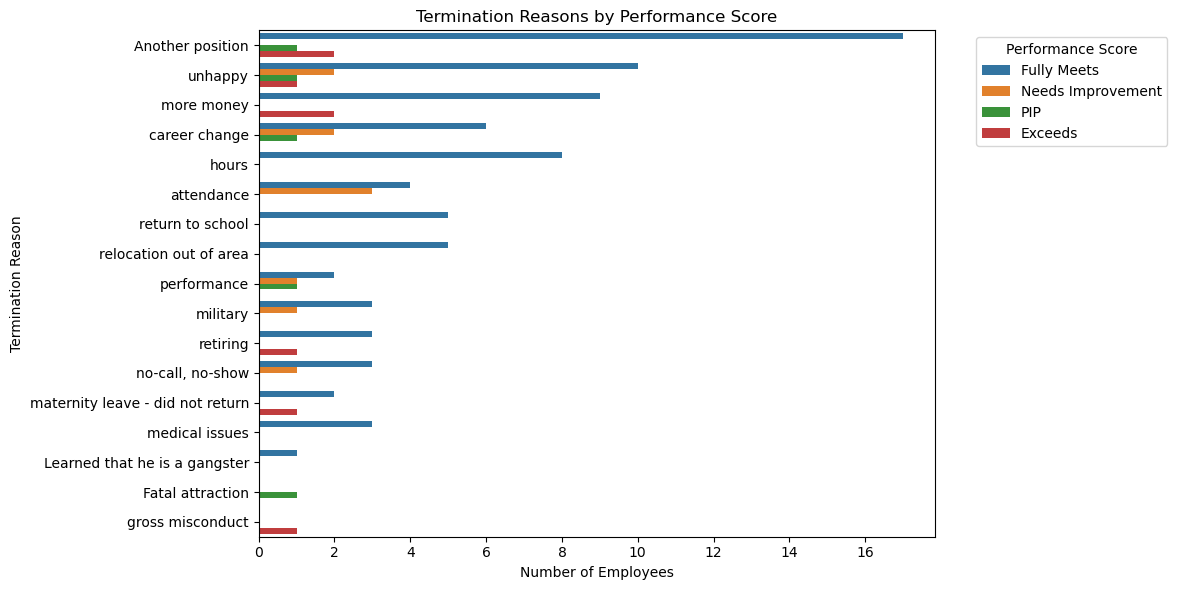

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=terminated_only, y='TermReason', hue='PerformanceScore', order=terminated_only['TermReason'].value_counts().index)
plt.title('Termination Reasons by Performance Score')
plt.xlabel('Number of Employees')
plt.ylabel('Termination Reason')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
summary4 = terminated_only.groupby(['TermReason', 'EmpSatisfaction']).size().reset_index(name='Count')
print(summary4)

                          TermReason  EmpSatisfaction  Count
0                   Another position                2      1
1                   Another position                3      4
2                   Another position                4      7
3                   Another position                5      8
4                   Fatal attraction                5      1
5      Learned that he is a gangster                5      1
6                         attendance                3      2
7                         attendance                4      4
8                         attendance                5      1
9                      career change                3      4
10                     career change                4      3
11                     career change                5      2
12                  gross misconduct                5      1
13                             hours                3      3
14                             hours                4      3
15                      

/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_31842/2508075106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


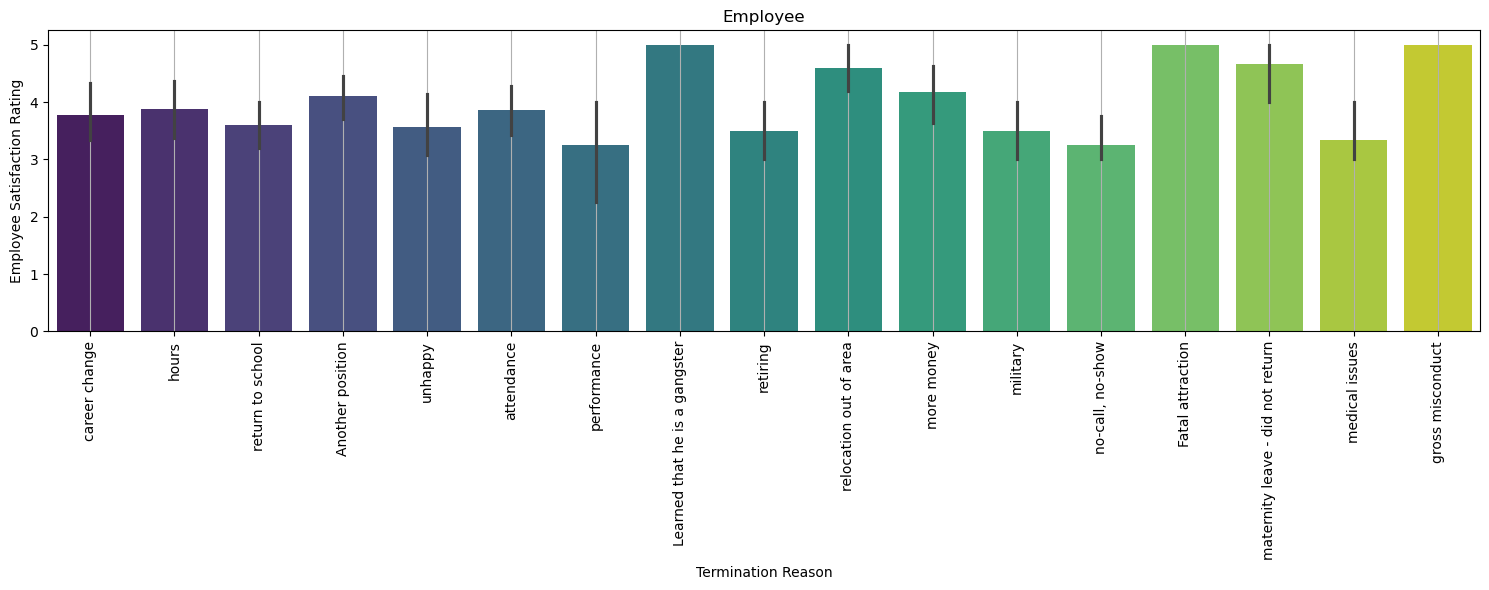

In [55]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=terminated_only,
    x='TermReason',
    y='EmpSatisfaction',
    palette='viridis'
)
plt.xlabel('Termination Reason')
plt.ylabel('Employee Satisfaction Rating')
plt.title('Employee')
plt.grid(True, axis='x')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Part 3: Analysis

Which recruitment sources are linked to higher retention? Which recruitment sources are linked to the highest termination rates?

Answer here:

What are the most common termination reasons? How do they vary by department, tenure, and performance?

Answer here: